In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import pandas as pd


In [ ]:
# Example CSV file path
os.chdir("E:\\Andy\\3dplots")
file_path = 'Top40_less.csv'

# Read specific columns (e.g., 'Column1' and 'Column3')
columns_to_import = ['Acronym', 'dNormcohen_d']
dd = pd.read_csv(file_path, usecols=columns_to_import)
df = pd.DataFrame(dd)
dict_without_headers = dict(zip(df["Acronym"], df["dNormcohen_d"]))


In [25]:

# Extract regions and values
regions = list(dict_without_headers.keys())
values = np.array(list(dict_without_headers.values()))

# Define the colormap (RdBu) and normalize
cmap = plt.cm.coolwarm
#norm = mcolors.Normalize(vmin=-max(abs(values)), vmax=max(abs(values)))
norm = mcolors.Normalize(vmin=-1.5, vmax=1.5)



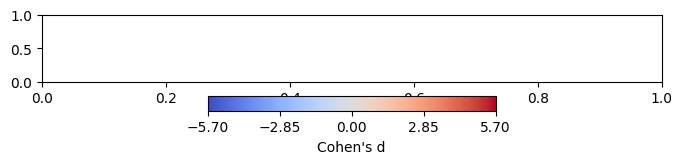

In [43]:
# Create a figure and Axes for the colorbar
fig, ax = plt.subplots(figsize=(8, 2))
fig.subplots_adjust(bottom=0.4)  # Adjust bottom margin to fit annotations

# Create the colorbar using ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for ScalarMappable
cbar = fig.colorbar(sm, orientation='horizontal', ticks=np.linspace(-max(abs(values)), max(abs(values)), 5), ax=ax)
cbar.set_label("Cohen's d")

# Add text annotations for each brain region along the continuum
for region, value in cohen_d_dict.items():
    # Calculate the position of the annotation on the colorbar
    pos = (value - norm.vmin) / (norm.vmax - norm.vmin)  # Normalize the value to [0, 1]
    ax.text(pos, -0.3, region, ha='center', va='center', transform=ax.transAxes)

plt.show()



In [30]:
# Set the working directory
os.chdir(r'C:\Users\admin\Desktop\code\cfos_analysis')

# Specify the file path
file_path = 'papaez_zsyn_cfos.xlsx'

# Specify the sheet name or index
sheet_name = 0  # Replace with the desired sheet name or index

# Read the specified sheet and only the required columns
#columns_to_import = ['Acronym', 'dNormcohen_d']
columns_to_import = ['Acronym', 'LC_Syn_zsc']
data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_import)

# Create a dictionary from the imported data
#dict_without_headers = dict(zip(data["Acronym"], data["dNormcohen_d"]))
dict_without_headers = dict(zip(data["Acronym"], data["LC_Syn_zsc"]))



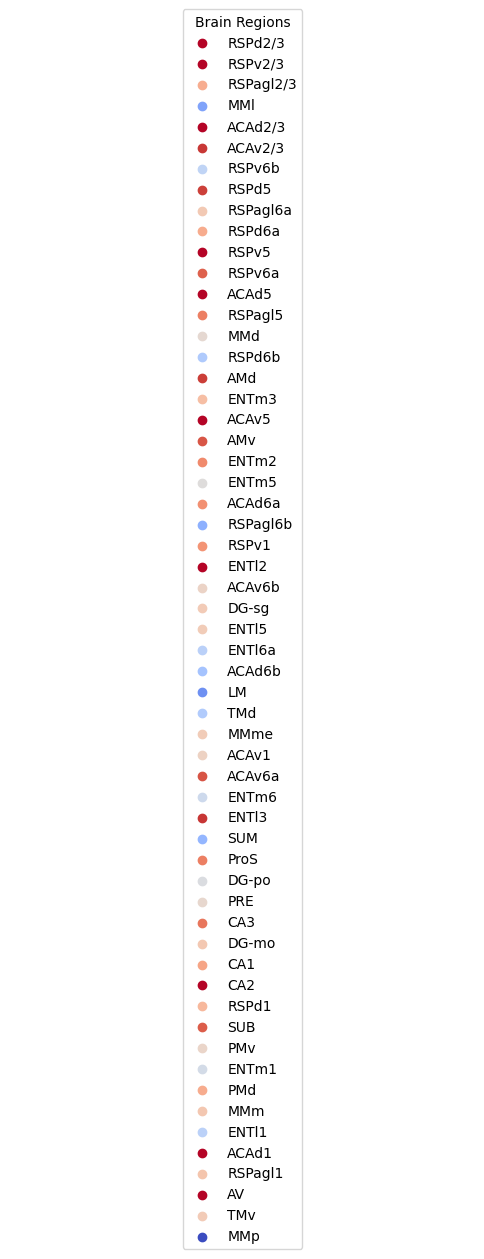

In [31]:


plt.show()
# Add text annotations for each brain region
plt.figure(figsize=(6, 4))
for region, value in dict_without_headers.items():
    plt.scatter([], [], color=cmap(norm(value)), label=f'{region}')
plt.legend(loc='center', frameon=True, title="Brain Regions")

plt.axis('off')  # Hide axes for a cleaner legend
plt.show()